## Problem 1

### Question a)

The team  spends 30 hours working on the project and uses Python. So, let $ x=30 $ and $ Z=1 $. 

In [2]:
import numpy as np
b0 = - 3.50
b1 = 0.18
b2 = 1.24
x = 30
z = 1
P = 1/(1+np.exp(-(b0 + b1*x + b2*z)))
print(" The probability for the team of having a good grade is equal to", P)

 The probability for the team of having a good grade is equal to 0.9585128806983042


By using the logistic regression model: $$ Pr(Y= 1|X,Z) = \frac{1}{1 + \exp(-(\beta_0 + \beta_1\times X + \beta_2\times Z)}  $$

with $β0=−3.50,β1= 0.18,β2= 1.24, X = 30$ and $Z = 1$, we obtain that the probability for the team of having a good grade is equal to $0.958$.


### question b) (a)

In this new model, the intercept and the slope of X are dependent of the value of Z. If Z = 1, the intercept will be $\alpha_0$ and the slope of X will be $\alpha_1$. If Z = 0, the intercept will be $\beta_0$ and the slope of X will be $\beta_1$. In the first logistic regression model, the intercept and the slope of x  were independent of the value of Z. 
\
For each value of Z, the model makes a prediction of the probability of having a good grade using a logistic function depending on the value of X. 

### question b) (b)

 To fit the new model to the training data, I would split the training data in two subsets of training data. In the first set, I will put all the training data which have Z=0 and in the second set, all the training data which have Z=1. Then, I will apply the subroutine standard logistic regression model to each of the training sets independently. To have the final probability, we addition the two models by weighting them respectively by (1-Z) for the set with the data having Z=0 and by Z for the set of data with data having Z=1. 

### question b) (c)

The team  spends 30 hours working on the project and uses Python. So, let $ x=30 $ and $ z=1 $. 

In [3]:
import numpy as np
a0 = - 4.02
a1 = 0.24
b0 = -2.85
b1 = 0.15
x = 30
z = 1
P = z*1/(1+np.exp(-(a0 + a1*x ))) +(1-z)*1/(1+np.exp(-(b0 + b1*x )))
print(P)

0.960074666047186


By using the logistic regression model: $$ Pr(Y= 1|X,Z) = Z\times\frac{1}{1 + \exp(-(\alpha_0 + \alpha_1\times X )} + (1-Z)\times \frac{1}{1 + \exp(-(\beta_0 + \beta_1\times X )}  $$

with $\alpha_0 = - 4.02$ , $\alpha_1 = 0.24$, $\beta_0 = -2.85$, $\beta_1 = 0.15$, $X = 30$ and $Z = 1$. 

We obtain that the probability for the team of having a good grade is equal to $0.960$.


### question b) (d)

In this case, the data set is quite big (90 students) and each of the subsets of students using R or Python are also quite big (respectively 40 and 50 students). We can also remark that, grades of students working with Python seem to follow a different distribution than grades of students working with R : students using Python have a probability of 3/5 to have a good grade while students using R have a probability of 1/2 to have a good grade. In this case, the second logistic model seems more adapted to describ the probability of having a good grade of students : there is enough data to compute the parameters of the two factors, and the two factors (which represent the utilisation of R or Python) seem to follow a different function. 

I expect the second model to make more accurate probability predictions in future semesters.


### question b) (e)

In this case, the data set is small (15 students) and each of the subsets of students using R or Python are also very small (respectively 5 and 10 students). We can also remark that, grades of students working with Python seem to follow the same distribution than grades of students working with R : students using Python have a probability of 1/2 to have a good grade while students using R have also a probability of 1/2 to have a good grade. In this case, the first logistic model seems more adapted to describ the probability of having a good grade of students :  it is more adapted to have a regular logistic function representing the probability of having a good grade because there is not enough data to compute the parameters of the two separate factors, and the two factors (which represent the utilisation of R or Python) seem to follow a same function. 

I expect the first model to make more accurate probability predictions in future semesters.


## Problem 2

For a fixed $x$, the expected loss (EL) of Predicting $Y = 0$ is : 
$$ EL(0|x)(p) = L_{TN} \times Pr(Y= 0|x) + L_{FN} \times Pr(Y= 1|x) = L_{FN} \times Pr(Y= 1|x) = L_{FN} \times p   $$ 

The expected loss (EL) of Predicting $Y = 1$ is : 
$$ EL(1|x)(p) = L_{TP} \times Pr(Y= 1|x) + L_{FP} \times Pr(Y= 0|x) = L_{FP} \times Pr(Y= 0|x) = L_{FP} \times (1-p) $$


The value  $\overline{p}$ such  that following  the  expected  loss  criterion  for  making  a  prediction  is equivalent to predicting Y= 1 if $p ≥ \overline{p}$ and predicting Y= 0 otherwise, is the solution of the equation : $$ EL(0|x)(p) = EL(1|x)(p)  \iff  \overline{p}  = \frac{L_FP}{L_FP + L_FN} $$ 

The value of $\overline{p}$ is $\frac{L_FP}{L_FP + L_FN}$.

## Problem 3

## question a)
### Load the Data


In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

?smf.logit

Framingham = pd.read_csv("framingham_train.csv")
Framingham.info()
Framingham.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2560 non-null   int64  
 1   age              2560 non-null   int64  
 2   education        2560 non-null   object 
 3   currentSmoker    2560 non-null   int64  
 4   cigsPerDay       2560 non-null   int64  
 5   BPMeds           2560 non-null   int64  
 6   prevalentStroke  2560 non-null   int64  
 7   prevalentHyp     2560 non-null   int64  
 8   diabetes         2560 non-null   int64  
 9   totChol          2560 non-null   int64  
 10  sysBP            2560 non-null   float64
 11  diaBP            2560 non-null   float64
 12  BMI              2560 non-null   float64
 13  heartRate        2560 non-null   int64  
 14  glucose          2560 non-null   int64  
 15  TenYearCHD       2560 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 320.1+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,41,Some high school,1,43,0,0,1,0,306,199.0,106.0,38.75,100,75,0
1,0,38,High school/GED,1,15,0,0,0,0,176,110.0,80.0,24.03,100,113,0
2,1,42,High school/GED,1,9,0,0,0,0,205,110.0,73.0,22.40,61,66,0
3,0,42,High school/GED,0,0,0,0,1,0,263,150.0,88.0,23.68,96,78,0
4,0,53,High school/GED,0,0,0,0,1,0,272,146.0,89.0,25.50,73,67,0


### LOGISTIC REGRESSION (NUMERICAL + CATEGORICAL VARIABLES)

In [5]:
# Fit the logistic regression model

logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes+ totChol + sysBP + diaBP + BMI + heartRate + glucose ',
                   data = Framingham).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.365281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                  0.1331
Time:                        17:29:53   Log-Likelihood:                -935.12
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.181e-51
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 


#### question i) 
With the logistic  regression  mode, we obtain the following equation : 

$$ Pr(TenYearCHD = 1| independentVariables) = \frac{1}{1 + \exp(-(-9.2740 - 0.1053 \times 1_{T.High school/GED} - -0.1025 \times 1_{T.Some college/vocational school} +  0.0610 \times 1_{T.Some high school} +  0.5621 \times 1_{male}+ 0.0689 \times 1_{age} + 0.1539 \times 1_{currentSmoker} +  0.0155 \times cigsPerDay + 0.1528 \times 1_{BPMeds} + 0.8209 \times 1_{prevalentStroke} + 0.2075 \times 1_{prevalentHyp} -  0.2975 \times 1_{diabetes} + 0.0020 \times totCHol + 0.0181 \times sysBP - 0.0045 \times diaBP + 0.0136 \times BMI - 0.0046 \times heartRate + 0.0096 \times glucose ) )} $$ 

#### question ii) 
We have that : $ \log (Odds(Y=1|X)) =\beta_0+\beta_1 \times X1+ \beta_2 \times X2+...+\beta_p \times Xp $.
The higher the coefficient of a independent variable is, the higher the odds of having a CHD in 10 years will be. 
The most important risk factors for 10-year CHD risk are the factors with the higher coefficients, that is prevalentStroke (coefficient equal to $ 0.8209 $) and male (coefficient equal to $ 0.5621 $). 

For example, for the factor prevalentStroke, odds of a person who had a prevalentStroke, odds for 10-year CHD risk are multiplied by : $\exp(0.8209) = 2.27 $

#### question iii) 
Given the colleague’s analysis of the costs and benefits associated with the recently approved treatment, we have that : 
The expected loss (EL) of Predicting $Y = 0$ is :
$$ EL(0|x)(p) = L_{TN} \times Pr(Y= 0|x) + L_{FN} \times Pr(Y= 1|x) = 700,000 \times p  $$ 

The expected loss (EL) of Predicting $Y = 1$ is : 
$$ EL(1|x)(p) = L_{TP} \times Pr(Y= 1|x) + L_{FP} \times Pr(Y= 0|x) = 775,000 \times 0.15p + 75,000 \times (1-0,15p) $$

$\overline{p}$ is the solution of the equation : $$ EL(0|x)(p) = EL(1|x)(p)  \iff 700,000 \times p = 775,000 \times 0.15p + 75,000 \times (1-0,15p)
\iff  \overline{p}  = 0.126 $$ 

#### question iv) 
First, we upload the test data set. 

In [6]:
framingham_test = pd.read_csv("framingham_test.csv")
framingham_test.info()
framingham_test.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1098 non-null   int64  
 1   age              1098 non-null   int64  
 2   education        1098 non-null   object 
 3   currentSmoker    1098 non-null   int64  
 4   cigsPerDay       1098 non-null   int64  
 5   BPMeds           1098 non-null   int64  
 6   prevalentStroke  1098 non-null   int64  
 7   prevalentHyp     1098 non-null   int64  
 8   diabetes         1098 non-null   int64  
 9   totChol          1098 non-null   int64  
 10  sysBP            1098 non-null   float64
 11  diaBP            1098 non-null   float64
 12  BMI              1098 non-null   float64
 13  heartRate        1098 non-null   int64  
 14  glucose          1098 non-null   int64  
 15  TenYearCHD       1098 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 137.4+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,46,Some high school,1,20,0,0,0,0,219,118.0,79.0,24.17,70,90,0
1,0,65,Some college/vocational school,0,0,0,0,1,0,216,163.0,102.0,30.12,91,73,0
2,0,41,College,0,0,0,0,0,0,159,119.0,76.0,27.49,55,70,0
3,0,39,Some high school,0,0,0,0,0,0,229,125.0,80.0,24.10,75,58,0
4,0,51,Some high school,0,0,0,0,1,0,225,155.0,92.5,23.84,72,63,0


We will describe the test set performance of the logistic regression model, using the threshold identified  in  part  (iii)  to  separate  patients  into  those  who  are  at  high  risk  for  CHD(risk exceeding the threshold ) and those who are at low risk for CHD (risk below the threshold ). 

In [7]:
y_test = framingham_test['TenYearCHD']

y_prob = logreg.predict(framingham_test)
#separate  patients  into  those  who  are  at  high  risk  for  CHD(risk exceeding the threshold ) and those who are at low risk for CHD (risk below the threshold )
y_pred = pd.Series([1 if x > 0.126 else 0 for x in y_prob], index=y_prob.index)


In order to evaluate the performance of our classification model, we can make use of confusion matrix to compute the model’s accuracy, True Positive Rate (TPR), and False PositiveRate  (FPR).

In [1]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 
print(cm[1][0])



In [9]:
# Accuracy
accuracy = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print('The accuracy is equal to' , accuracy)

The accuracy is equal to 0.6265938069216758


In [10]:
# True Positive Rate
TPR = cm[1][1]/(cm[1][1]+cm[1][0])
print('The True Positive Rate is equal to' , TPR)

The True Positive Rate is equal to 0.68


In [11]:
# Falsed Positive Rate
FPR = cm[0][1]/(cm[0][1]+cm[0][0])
print('The False Positive Rate is equal to' , FPR)

The False Positive Rate is equal to 0.38353196099674974


The accuracy is the rate of good answer (accurate predictions, the model predict Y=0 if Y is actually equal to 0 or predict Y=1 if Y is actually equal to 1. Here, the accuracy is equal to 0.63, which means that the model gives a good answer (an accurate prediction) 63% of the time when we compute it. 

The True Positive Rate (TPR) is the rate of accurate answer when we only look at the positive answers predict by the model (the model predict Y=1 when Y is actually equal to 1). Here, the TPR is equal to 0.68, which mean that when the model give a positive answer (Y=1), there is 68% chance it is actually true. 

The False Positive Rate (TPR) is the rate of false answer when we only look at the negative answers predict by the model. Here, the FPR is equal to 0.38, which mean that when the model give a negative answer (Y=1), there is 38% chance it is not actually true. 

#### question v)

In order to estimate the expected economic cost per patient, I will first report my estimate assuming that the CHD outcomes in the test set are not affected by the treatment decision. The expected economic cost per patient is equal to the probability of predicting the 10-year CHD knowing that the patient will have it or not, multiplied by the cost of having the disease (with or without the treatment). 
The expected economic cost per patient is equal to : 

$$ E(cost) = Pr(y_{pred} =1|TenYearCHD=1) \times 750000 + Pr(y_{pred} =1|TenYearCHD=0) \times 75000  + Pr(y_{pred} =0|TenYearCHD=1) \times 700000 + Pr(y_{pred} =0|TenYearCHD=0) \times 0  $$

We use the test set data to provide an estimate value for the expected economic cost per patient.

In [12]:
n = len(y_test)
Exp_cost_ass = 750000*cm[1][1]/n + 75000*cm[0][1]/n + 700000*cm[1][0]/n
print("The expected cost assuming that the CHD outcomes in the test set are not affected by the treatment decision is equal to " , Exp_cost_ass)

The expected cost assuming that the CHD outcomes in the test set are not affected by the treatment decision is equal to  141165.75591985427


Assuming that the CHD outcomes in the test set are not affected by the treatment decision seems not reasonable. The expected cost we calculated represents the cost of disease, plus the cost of the medication but with no effect of the medication. In other words, patients paid for a medication that has no effect at all. 

But when we look at the figure 1 (the decision tree), we see that the medication has an effect. The probability of having 10-year CHD when the patient takes the medication decrease by 85%. From a probability p without the medication, patient have a probability $0.15 \times p$ of having it with the medication. As this dataset was collected before the option of prescribing the medication, this decrease of probability is not taken in account. We have to add it.    

In [13]:
n = len(y_test)
Exp_cost = 0.15*750000*cm[1][1]/n + 75000*cm[0][1]/n + 0.85*75000*cm[1][1]/n + 700000*cm[1][0]/n
print("The expected cost is now equal to " , Exp_cost)

The expected cost is now equal to  78983.37887067394


This time, the expected value is equal to $78983 which is lower and more reasonable. 

#### question vi)

Consider a simple baseline model that predicts none of the patients are at high risk for CHD and therefore does not recommend treatment for any of the patients. We compare y_test the value of the test set describing if the patient has 10-years CHD risk or not and y_baseline, the assumption that none of the patients are at high risk. 


Describe the test set performance of the baseline model in terms of accuracy, TPR, and FPR, as wellas expected economic cost per patient.

In [14]:
from sklearn.metrics import confusion_matrix

n = len(y_test)
y_baseline = [0]*n

cm_baseline = confusion_matrix(y_test, y_baseline)
print ("Confusion Matrix : \n", cm_baseline) 
print(cm[1][0])

Confusion Matrix : 
 [[923   0]
 [175   0]]
56


In [15]:
# Accuracy
accuracy_baseline = (cm_baseline.ravel()[0]+cm_baseline.ravel()[3])/sum(cm_baseline.ravel())
print('The accuracy of the baseline model is equal to' , accuracy_baseline)

# True Positive Rate
TPR_baseline = cm_baseline[1][1]/(cm_baseline[1][1]+cm_baseline[1][0])
print('The True Positive Rate of the baseline model is equal to' , TPR_baseline)

# Falsed Positive Rate
FPR_baseline = cm_baseline[0][1]/(cm_baseline[0][1]+cm_baseline[0][0])
print('The False Positive Rate of the baseline model is equal to' , FPR_baseline)

# Expected cost 
Exp_cost_baseline = 700000*cm_baseline[1][0]/(cm_baseline[1][0]+cm_baseline[0][0])
print('The expected cost per patient of the baseline model is equal to' , Exp_cost_baseline)

The accuracy of the baseline model is equal to 0.8406193078324226
The True Positive Rate of the baseline model is equal to 0.0
The False Positive Rate of the baseline model is equal to 0.0
The expected cost per patient of the baseline model is equal to 111566.48451730418


The accuracy is better than in the last model (because there are not any more false negatives), but the TPR and FPR are equal to zero, which is logical because the baseline model doesn't give positive answers. The expected cost of the baseline model is better than the first biaised expected cost we calculated but higher than the "real" expected cost we calculated.  

#### question vii)

Female, age 45, college education, currently a smoker with an average of 9 cigarettes per day.  Currently on blood pressure medication, has had stroke but not hypertensive.  Currently diagnosed with diabetes; total Cholesterolat 220.  Systolic/diastolic blood pressure at 140/100, BMI at 33, heart rateat 69, glucose level at 74.

In [16]:
P  = 1/ (1 + np.exp(-(-9.2740 - 0.1053*0 -0.1025*0 +  0.0610*0 +  0.5621*0 + 0.0689*45 + 0.1539*1 +  0.0155*9 + 0.1528*1 + 0.8209*1 + 0.2075*0 -  0.2975*1 + 0.0020*220 + 0.0181*140 - 0.0045*100 + 0.0136*33 - 0.0046*69 + 0.0096*74)) ) 
print('we predict that the probaility she had a 10-year CHD is equal to' , P)

we predict that the probaility she had a 10-year CHD is equal to 0.13727615722302594


The probability is greater that the value of the threshold from part (iii) from the decision tree $\overline{p}  = 0.126 $.
The physician should prescribe the preventive medication for this patient.

## question b)

Plot the ROC curve for your logistic regression model on the test set 

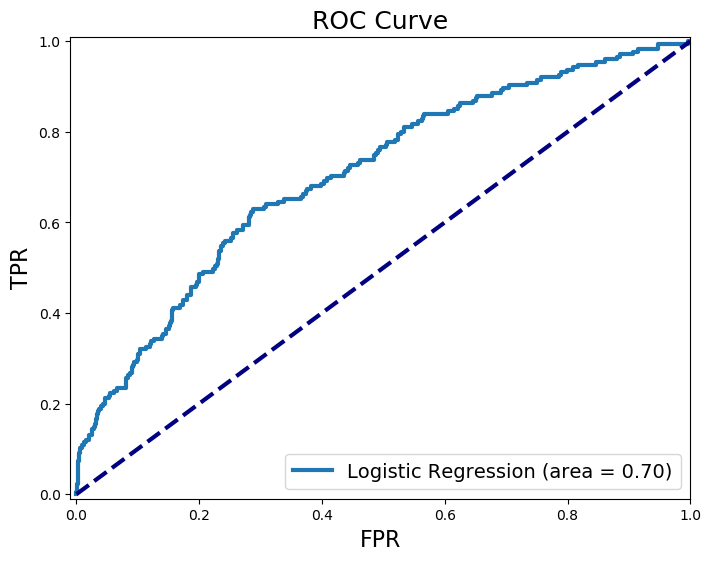

In [17]:
y_test = framingham_test['TenYearCHD']
X_test = framingham_test.drop(['TenYearCHD'],axis=1)


y_prob = logreg.predict(framingham_test)
#separate  patients  into  those  who  are  at  high  risk  for  CHD(risk exceeding the threshold ) and those who are at low risk for CHD (risk below the threshold )
y_pred = pd.Series([1 if x > 0.126 else 0 for x in y_prob], index=y_prob.index)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

The ROC curve for the logistic regression model shows the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. If we had ROC curves related to other medications, we could have compared it : the "highest" curve corresponds to the medication the most efficient, and if the curves intersect, the best medication is the one related to the highest curve arround the threshold value (0.126 here). 

By examining the ROC curve, we can verify the result of TPR and FPR we fund in the previous questions (TPR = 0.68 and FPR = 0.38). 

The area under the curve (AUC) for the model in the test set is equal to 0.70. A perfect model has an area under the ROC curve equal to 1 and an area under the ROC curve  equal to 0.5 has no discrimination capacity to distinguish between positive class and negative class. Here, the area under the curve is equal to 0.70, which means that there is a 70% chance that the model will be able to distinguish between positive class and negative class. The model is good, but not very good. 

## question c)

What value of C should the insurance company charge as aco-payment for the medication in order that the patients would “self select” in a manner thatis consistent with the previously examined “optimal strategy” discussed in part(a)above?

We want to keep the same threshold than in the question (a), which is equal to $ \overline{p}  = 0.126 $
C is the solution of the following equation : 

$$ EL(0|x)(C) = EL(1|x)(C)  \iff 500,000 \times  \overline{p} = (500,000 + C) \times 0.15 \overline{p} + C \times (1-0,15 \overline{p})
\iff  C  =  53,550.0 $$ 



The insurance company should charge as aco-payment for the medication a value equal to 53,550.0$

## question d)

Taking in account the education of a person to predict if he/she will have a disease or not seems to me no ethical and also weird. I can't understand the correlation between education and 10-year CHD. We can remark that the education seems to be correlated with other variables when we look at the p-values. We could change the analysis on removing this categorical variables, which would not change the quality of the logistic regression a priori. 

An other ethical aspect is the fact that the medication is preventive and can potentially have side effects. Making patients paid for it if there is side effects and no guarentee not to have the disease can be unethical. One way of changing the analysis is by taking in account the potential side effects of the medication. 

In [2]:
from sklearn.metrics import roc_curve, auc

In [3]:
roc_curve?